In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as sps
import json
import tkinter as tk
from tkinter import filedialog
from tkinter import messagebox

# Import API key
from config import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

url = "http://api.openweathermap.org/data/2.5/weather?"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
countries = []
# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    country = citipy.nearest_city(lat_lng[0], lat_lng[1]).country_code
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        countries.append(country)
# Print the city count to confirm sufficient count
len(cities)

585

In [3]:
cities_df = pd.DataFrame(data=cities)
cities_df["City"] = cities
cities_df["Country"] = countries
cities_df = cities_df.drop([0], axis = 1)
cities_df = cities_df.drop_duplicates()
cities_df

,City,Country
0,bargal,so
1,vaini,to
2,rokytne,ua
3,hithadhoo,mv
4,mahebourg,mu
...,...,...
580,ambodifototra,mg
581,zachagansk,kz
582,laurel,us
583,dunmore town,bs


In [4]:
all_cities = []
all_countries = []
lats = []
lons = []
max_temps = []
humidities = []
clouds = []
wind_speeds = []
dates = []


for index, row in cities_df.iterrows():
     
        try:
            city = row["City"]
            country = row["Country"]
            city_num = index +1
            query_url = f"{url}q={city}&{country}&appid={api_key}"
            current_weather = requests.get(query_url)
            weather_json = current_weather.json()
            
            lat = weather_json["coord"]["lat"]   
            lon = weather_json["coord"]["lon"] 
            k_temp = weather_json["main"]["temp_max"] 
            max_temp = (k_temp - 273.15) * 9/5 + 32          
            humidity = weather_json["main"]["humidity"]
            cloudiness = weather_json["clouds"]["all"]
            wind_speed = weather_json["wind"]["speed"] 
            date = weather_json["dt"]
            
            lats.append(lat)
            lons.append(lon)
            max_temps.append(max_temp)
            humidities.append(humidity)
            clouds.append(cloudiness)
            wind_speeds.append(wind_speed)
            dates.append(date)
            all_cities.append(city)
            all_countries.append(country)
            
            round_lats.append(round_lat)
            round_lngs.append(round_lng)
            print(f"Retrieving Results for city #{city_num} : {city}, {country}")
        except:
            print("unable to locate city. skipping...")

unable to locate city. skipping...
Retrieving Results for city #2 : vaini, to
Retrieving Results for city #3 : rokytne, ua
Retrieving Results for city #4 : hithadhoo, mv
Retrieving Results for city #5 : mahebourg, mu
Retrieving Results for city #6 : rikitea, pf
Retrieving Results for city #7 : faanui, pf
unable to locate city. skipping...
Retrieving Results for city #9 : port hardy, ca
Retrieving Results for city #10 : belle fourche, us
unable to locate city. skipping...
Retrieving Results for city #12 : bengkulu, id
Retrieving Results for city #13 : ponta do sol, cv
Retrieving Results for city #14 : bethel, us
Retrieving Results for city #15 : bantou, cn
Retrieving Results for city #16 : prince george, ca
Retrieving Results for city #17 : chuy, uy
Retrieving Results for city #18 : manggar, id
Retrieving Results for city #19 : ancud, cl
Retrieving Results for city #20 : nikolskoye, ru
Retrieving Results for city #21 : souillac, mu
Retrieving Results for city #22 : leningradskiy, ru
Ret

Retrieving Results for city #177 : richards bay, za
unable to locate city. skipping...
Retrieving Results for city #179 : kayerkan, ru
Retrieving Results for city #180 : kieta, pg
Retrieving Results for city #181 : klaksvik, fo
Retrieving Results for city #182 : quibor, ve
unable to locate city. skipping...
unable to locate city. skipping...
Retrieving Results for city #185 : japura, br
Retrieving Results for city #186 : san jeronimo, mx
Retrieving Results for city #187 : necochea, ar
Retrieving Results for city #188 : victor harbor, au
Retrieving Results for city #189 : unai, br
Retrieving Results for city #190 : faya, td
Retrieving Results for city #191 : ilulissat, gl
Retrieving Results for city #192 : los llanos de aridane, es
unable to locate city. skipping...
Retrieving Results for city #194 : meulaboh, id
Retrieving Results for city #195 : tete, mz
Retrieving Results for city #196 : hamilton, bm
Retrieving Results for city #197 : thompson, ca
Retrieving Results for city #198 : s

Retrieving Results for city #353 : nantucket, us
Retrieving Results for city #354 : petropavlovsk-kamchatskiy, ru
Retrieving Results for city #355 : svetlyy, ru
Retrieving Results for city #356 : mbekenyera, tz
Retrieving Results for city #357 : bereznik, ru
Retrieving Results for city #358 : thap than, th
Retrieving Results for city #359 : ergani, tr
Retrieving Results for city #360 : humaita, br
Retrieving Results for city #361 : diffa, ne
Retrieving Results for city #362 : pisco, pe
Retrieving Results for city #363 : quatre cocos, mu
Retrieving Results for city #364 : villa maria, ar
Retrieving Results for city #365 : the valley, ai
Retrieving Results for city #366 : rocha, uy
Retrieving Results for city #367 : natalio, py
Retrieving Results for city #368 : sao paulo de olivenca, br
unable to locate city. skipping...
Retrieving Results for city #370 : kotido, ug
Retrieving Results for city #371 : awjilah, ly
Retrieving Results for city #372 : matara, lk
Retrieving Results for city #

Retrieving Results for city #526 : asyut, eg
Retrieving Results for city #527 : yongzhou, cn
unable to locate city. skipping...
Retrieving Results for city #529 : sao joao da barra, br
Retrieving Results for city #530 : dedham, us
Retrieving Results for city #531 : muravlenko, ru
Retrieving Results for city #532 : ludwigslust, de
Retrieving Results for city #533 : kovdor, ru
Retrieving Results for city #534 : garissa, ke
Retrieving Results for city #535 : saquarema, br
Retrieving Results for city #536 : whitecourt, ca
Retrieving Results for city #537 : colesberg, za
Retrieving Results for city #538 : portland, au
Retrieving Results for city #539 : hualmay, pe
Retrieving Results for city #540 : puerto del rosario, es
Retrieving Results for city #541 : birjand, ir
Retrieving Results for city #542 : makokou, ga
unable to locate city. skipping...
Retrieving Results for city #544 : olafsvik, is
Retrieving Results for city #545 : shelburne, ca
unable to locate city. skipping...
Retrieving Re

In [5]:
weather_frame = pd.DataFrame(list(zip(all_cities, all_countries, lats, lons, max_temps, humidities,clouds,wind_speeds,dates)),
               columns =["city", "country", "lat", "lng", "max_temp", "humidity", "cloudiness", "wind_speed", "date"])
weather_frame

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
0,vaini,to,-21.20,-175.20,71.600,78,75,4.10,1596361539
1,rokytne,ua,51.28,27.21,69.548,52,6,3.13,1596361539
2,hithadhoo,mv,-0.60,73.08,83.750,68,82,3.71,1596361539
3,mahebourg,mu,-20.41,57.70,75.200,69,40,7.20,1596361540
4,rikitea,pf,-23.12,-134.97,72.554,78,59,6.10,1596361540
...,...,...,...,...,...,...,...,...,...
529,yumen,cn,40.28,97.20,88.484,11,100,9.93,1596361651
530,abonnema,ng,4.71,6.79,77.000,88,40,3.10,1596361651
531,laurel,us,39.10,-76.85,78.008,94,90,1.50,1596361651
532,dunmore town,bs,25.50,-76.65,84.146,78,100,12.46,1596361652


In [6]:
weather_frame.to_csv("output_data/weather_csv", index=None)

In [7]:
weather_frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 534 entries, 0 to 533
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   city        534 non-null    object 
 1   country     534 non-null    object 
 2   lat         534 non-null    float64
 3   lng         534 non-null    float64
 4   max_temp    534 non-null    float64
 5   humidity    534 non-null    int64  
 6   cloudiness  534 non-null    int64  
 7   wind_speed  534 non-null    float64
 8   date        534 non-null    int64  
dtypes: float64(4), int64(3), object(2)
memory usage: 37.7+ KB


In [8]:
weather_frame["humidity"].sort_values(ascending=False)

390    100
188    100
44     100
508    100
387    100
      ... 
497      8
284      8
375      5
281      1
155      1
Name: humidity, Length: 534, dtype: int64

Text(0.5, 1.0, 'lattitude vs max temp')

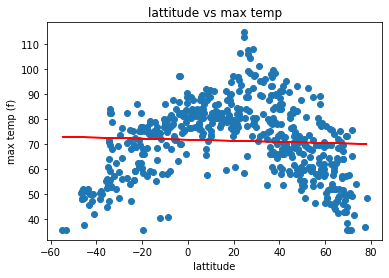

In [9]:
the_lats = weather_frame["lat"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, max_temps)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(the_lats, max_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

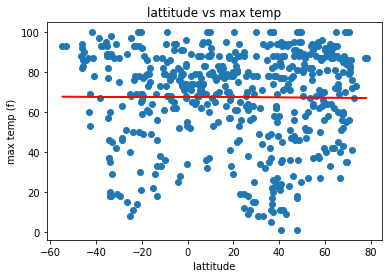

In [11]:
the_lats = weather_frame["lat"]
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(lats, humidities)
regress_values = the_lats * slope + intercept

plt.scatter(lats, humidities)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")
#plt.legend(line_eq)

Text(0.5, 1.0, 'lattitude vs max temp')

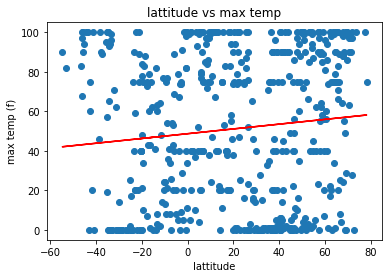

In [12]:
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, clouds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, clouds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")
#plt.legend(line_eq)

Text(0.5, 1.0, 'lattitude vs max temp')

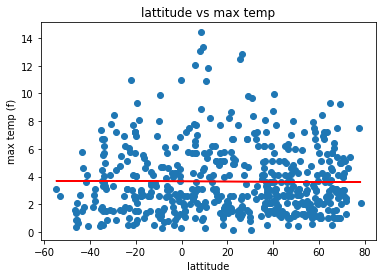

In [13]:
(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(the_lats, wind_speeds)
regress_values = the_lats * slope + intercept

plt.scatter(lats, wind_speeds)
plt.plot(lats, regress_values, "r-")
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")
#plt.legend(line_eq)

In [16]:
northern_df = weather_frame[weather_frame["lat"] > 0]
northern_df

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
1,rokytne,ua,51.28,27.21,69.548,52,6,3.13,1596361539
6,port hardy,ca,50.70,-127.42,59.504,84,96,0.45,1596361540
7,belle fourche,us,44.67,-103.85,57.992,71,1,5.10,1596361541
9,ponta do sol,cv,32.67,-17.10,73.994,71,15,2.37,1596361541
10,bethel,us,41.37,-73.41,73.400,88,90,1.50,1596361541
...,...,...,...,...,...,...,...,...,...
526,cherkasskoye,ru,52.43,47.22,68.306,60,66,2.18,1596361650
529,yumen,cn,40.28,97.20,88.484,11,100,9.93,1596361651
530,abonnema,ng,4.71,6.79,77.000,88,40,3.10,1596361651
531,laurel,us,39.10,-76.85,78.008,94,90,1.50,1596361651


In [18]:
southern_df = weather_frame[weather_frame["lat"] < 0]
southern_df

,city,country,lat,lng,max_temp,humidity,cloudiness,wind_speed,date
0,vaini,to,-21.20,-175.20,71.600,78,75,4.10,1596361539
2,hithadhoo,mv,-0.60,73.08,83.750,68,82,3.71,1596361539
3,mahebourg,mu,-20.41,57.70,75.200,69,40,7.20,1596361540
4,rikitea,pf,-23.12,-134.97,72.554,78,59,6.10,1596361540
5,faanui,pf,-16.48,-151.75,78.278,82,43,5.37,1596361540
...,...,...,...,...,...,...,...,...,...
513,lodja,cd,-3.48,23.43,97.268,28,74,1.42,1596361646
523,springbok,za,-29.66,17.89,73.562,18,0,8.42,1596361649
527,katherine,au,-14.47,132.27,78.800,29,41,2.60,1596361650
528,mocuba,mz,-16.84,36.99,74.156,60,60,2.69,1596361650


Text(0.5, 1.0, 'lattitude vs max temp')

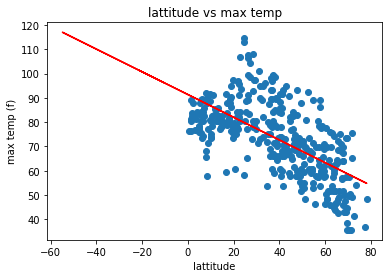

In [19]:
north_lats = northern_df["lat"]
north_temps = northern_df["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_temps)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


In [ ]:
north_humidities = northern_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_humidities)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_humidities)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

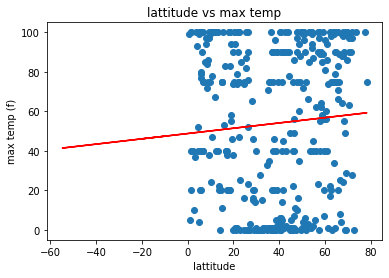

In [20]:
north_clouds = northern_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_clouds)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_clouds)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

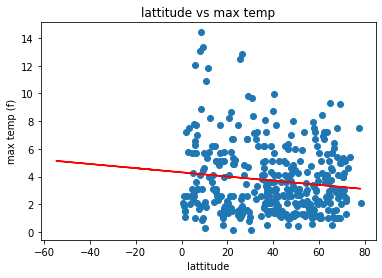

In [21]:
north_speeds = northern_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(north_lats, north_speeds)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(north_lats, north_speeds)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")


Text(0.5, 1.0, 'lattitude vs max temp')

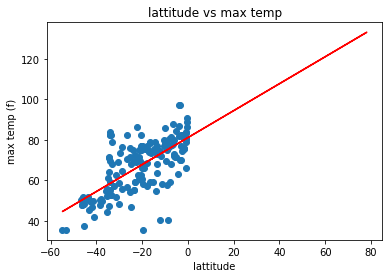

In [22]:
south_lats = southern_df["lat"]
south_temps = southern_df["max_temp"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_temps)
regress_values = the_lats * slope + intercept
line_eq = "y = " + str(round(slope, 2)) *  str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")

Text(0.5, 1.0, 'lattitude vs max temp')

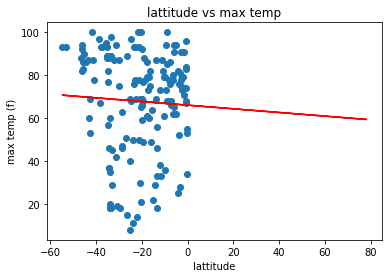

In [23]:
south_humidities = southern_df["humidity"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_humidities)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_humidities)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")

Text(0.5, 1.0, 'lattitude vs max temp')

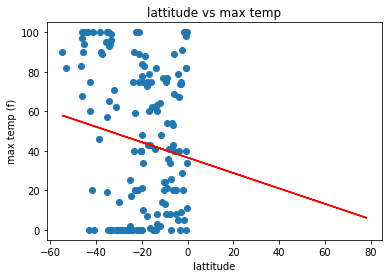

In [24]:
south_clouds = southern_df["cloudiness"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_clouds)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_clouds)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")

Text(0.5, 1.0, 'lattitude vs max temp')

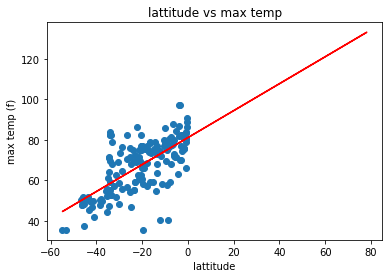

In [25]:
south_speeds = southern_df["wind_speed"]

(slope, intercept, rvalue, pvalue, stderr) = sps.linregress(south_lats, south_temps)
regress_values = the_lats * slope + intercept
#line_eq = "y = " + str(round(slope, 2)) + str(round(the_lats, 2)) = str(round(intercept, 2))
plt.scatter(south_lats, south_temps)
plt.plot(lats, regress_values, "r-")
#plt.legend(line_eq)
plt.xlabel("lattitude")
plt.ylabel("max temp (f)")
plt.title("lattitude vs max temp")